<h1>Final Project - MDdDM</h1>
<h3>As the final project, we must create a segmentation aiming to target insurances customers based on the K-Means clustering method</h3>


<h3>Project Description</h3>
As a Data Mining/Analytic Consultant, you are asked develop a Customer Segmentation in such a way that it will be possible for the Marketing Department to better understand all the different Customers’ Profiles.

You are expected to define, describe and explain the clusters you chose. Invest time in reasoning how you want to do your clustering, possible approaches, and advantages or disadvantages of different decisions. Simultaneous, you should express the marketing approach you recommend for each cluster. 

In [110]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import sys
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

<h1>I. Business Understanding</h1>



<h1>II. Data Understanding</h1>

<h2>Data Import and Understanding</h2>

<p>To import the data, we will simply use the function .read_sas from <b>Pandas<b> and call our DataFrame <b>"df"<b>.<p>
<p>Later, we will use some descriptive methods to understand our DataFrame and be prepare to work on it<p>
<h4>Descrtiptive Methods:<h4>
<ul>
<il>.info()<il>
<il>.unique()<il>
<il>.describe()<il>
<il>.isnull()<il>
<ul>



In [111]:
df = pd.read_sas('a2z_insurance.sas7bdat')

df.shape
df.info()
df.head()

(10296, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


CustID  FirstPolYear  BirthYear             EducDeg   MonthSal  GeoLivArea  \
0 1.00000    1985.00000 1982.00000  b'2 - High School' 2177.00000     1.00000   
1 2.00000    1981.00000 1995.00000  b'2 - High School'  677.00000     4.00000   
2 3.00000    1991.00000 1970.00000        b'1 - Basic' 2277.00000     3.00000   
3 4.00000    1990.00000 1981.00000      b'3 - BSc/MSc' 1099.00000     4.00000   
4 5.00000    1986.00000 1973.00000      b'3 - BSc/MSc' 1763.00000     4.00000   

   Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
0   1.00000   380.97000     0.39000  375.85000       79.45000   146.36000   
1   1.00000  -131.13000     1.12000   77.46000      416.20000   116.69000   
2   0.00000   504.67000     0.28000  206.15000      224.50000   124.58000   
3   1.00000   -16.99000     0.99000  182.48000       43.35000   311.17000   
4   1.00000    35.23000     0.90000  338.62000       47.80000   182.59000   

   PremLife  PremWork  
0  47.01000  16.89000  
1 194.48000 106.13000  
2  86.35000  99.02000  
3  35.34000  28.34000  
4  18.78000  41.45000

In [112]:
df.describe(include='all').T

count unique             top  freq       mean        std  \
CustID        10296.00000    NaN             NaN   NaN 5148.50000 2972.34352   
FirstPolYear  10266.00000    NaN             NaN   NaN 1991.06263  511.26791   
BirthYear     10279.00000    NaN             NaN   NaN 1968.00778   19.70948   
EducDeg             10279      4  b'3 - BSc/MSc'  4799        NaN        NaN   
MonthSal      10260.00000    NaN             NaN   NaN 2506.66706 1157.44963   
GeoLivArea    10295.00000    NaN             NaN   NaN    2.70986    1.26629   
Children      10275.00000    NaN             NaN   NaN    0.70676    0.45527   
CustMonVal    10296.00000    NaN             NaN   NaN  177.89260 1945.81151   
ClaimsRate    10296.00000    NaN             NaN   NaN    0.74277    2.91696   
PremMotor     10262.00000    NaN             NaN   NaN  300.47025  211.91500   
PremHousehold 10296.00000    NaN             NaN   NaN  210.43119  352.59598   
PremHealth    10253.00000    NaN             NaN   NaN  171.58083  296.40598   
PremLife      10192.00000    NaN             NaN   NaN   41.85578   47.48063   
PremWork      10210.00000    NaN             NaN   NaN   41.27751   51.51357   

                        min        25%        50%        75%         max  
CustID              1.00000 2574.75000 5148.50000 7722.25000 10296.00000  
FirstPolYear     1974.00000 1980.00000 1986.00000 1992.00000 53784.00000  
BirthYear        1028.00000 1953.00000 1968.00000 1983.00000  2001.00000  
EducDeg                 NaN        NaN        NaN        NaN         NaN  
MonthSal          333.00000 1706.00000 2501.50000 3290.25000 55215.00000  
GeoLivArea          1.00000    1.00000    3.00000    4.00000     4.00000  
Children            0.00000    0.00000    1.00000    1.00000     1.00000  
CustMonVal    -165680.42000   -9.44000  186.87000  399.77750 11875.89000  
ClaimsRate          0.00000    0.39000    0.72000    0.98000   256.20000  
PremMotor          -4.11000  190.59000  298.61000  408.30000 11604.42000  
PremHousehold     -75.00000   49.45000  132.80000  290.05000 25048.80000  
PremHealth         -2.11000  111.80000  162.81000  219.82000 28272.00000  
PremLife           -7.00000    9.89000   25.56000   57.79000   398.30000  
PremWork          -12.00000   10.67000   25.67000   56.79000  1988.70000

In [113]:
#Setting Customer ID as the Index of the DataFrame

df.set_index('CustID', inplace=True)

<h1>III. Data Preparation</h1>

<h2>1. Columns Dropping and Creation</h2>

In [114]:
df['Age'] = 2016 - df.BirthYear
df['YearsOfCustomer'] = 2016 - df.FirstPolYear
df.drop(['FirstPolYear', 'BirthYear'], axis=1, inplace=True)

df.head()

EducDeg   MonthSal  GeoLivArea  Children  CustMonVal  \
CustID                                                                     
1.00000  b'2 - High School' 2177.00000     1.00000   1.00000   380.97000   
2.00000  b'2 - High School'  677.00000     4.00000   1.00000  -131.13000   
3.00000        b'1 - Basic' 2277.00000     3.00000   0.00000   504.67000   
4.00000      b'3 - BSc/MSc' 1099.00000     4.00000   1.00000   -16.99000   
5.00000      b'3 - BSc/MSc' 1763.00000     4.00000   1.00000    35.23000   

         ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
CustID                                                                          
1.00000     0.39000  375.85000       79.45000   146.36000  47.01000  16.89000   
2.00000     1.12000   77.46000      416.20000   116.69000 194.48000 106.13000   
3.00000     0.28000  206.15000      224.50000   124.58000  86.35000  99.02000   
4.00000     0.99000  182.48000       43.35000   311.17000  35.34000  28.34000   
5.00000     0.90000  338.62000       47.80000   182.59000  18.78000  41.45000   

             Age  YearsOfCustomer  
CustID                             
1.00000 34.00000         31.00000  
2.00000 21.00000         35.00000  
3.00000 46.00000         25.00000  
4.00000 35.00000         26.00000  
5.00000 43.00000         30.00000

<h2>2. Finding and Dealing with Outliers</h2>

Before removing NaN values, we will deal with the Outliers in order to be able to use the data base mean later without overestimating the values.

Source: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

<Figure size 1440x720 with 0 Axes>

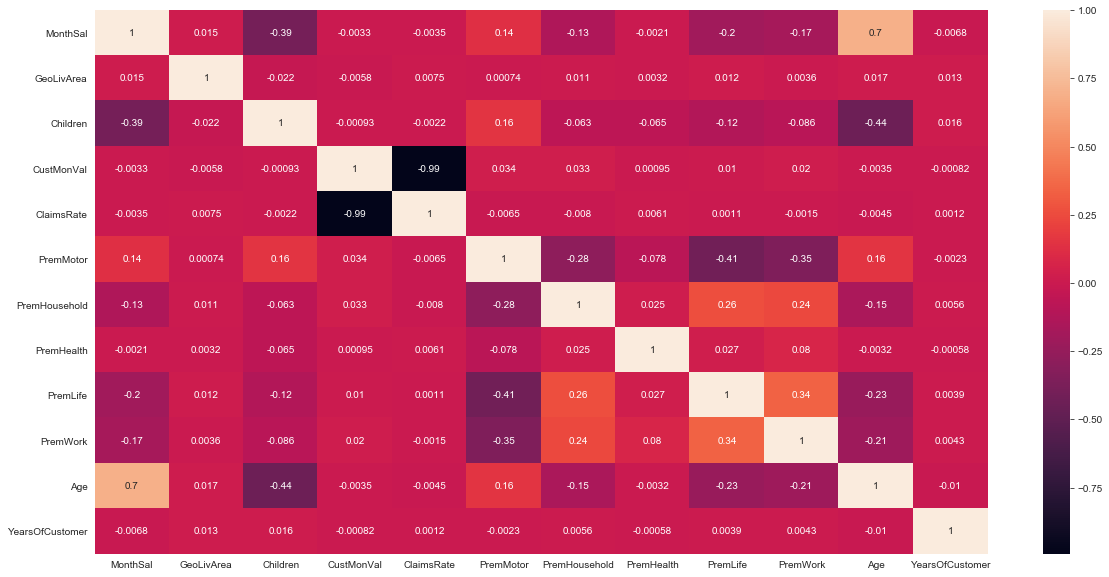

In [115]:
plt.figure(figsize=(20, 10))

heatmap = sns.heatmap(df.corr(), annot=True)

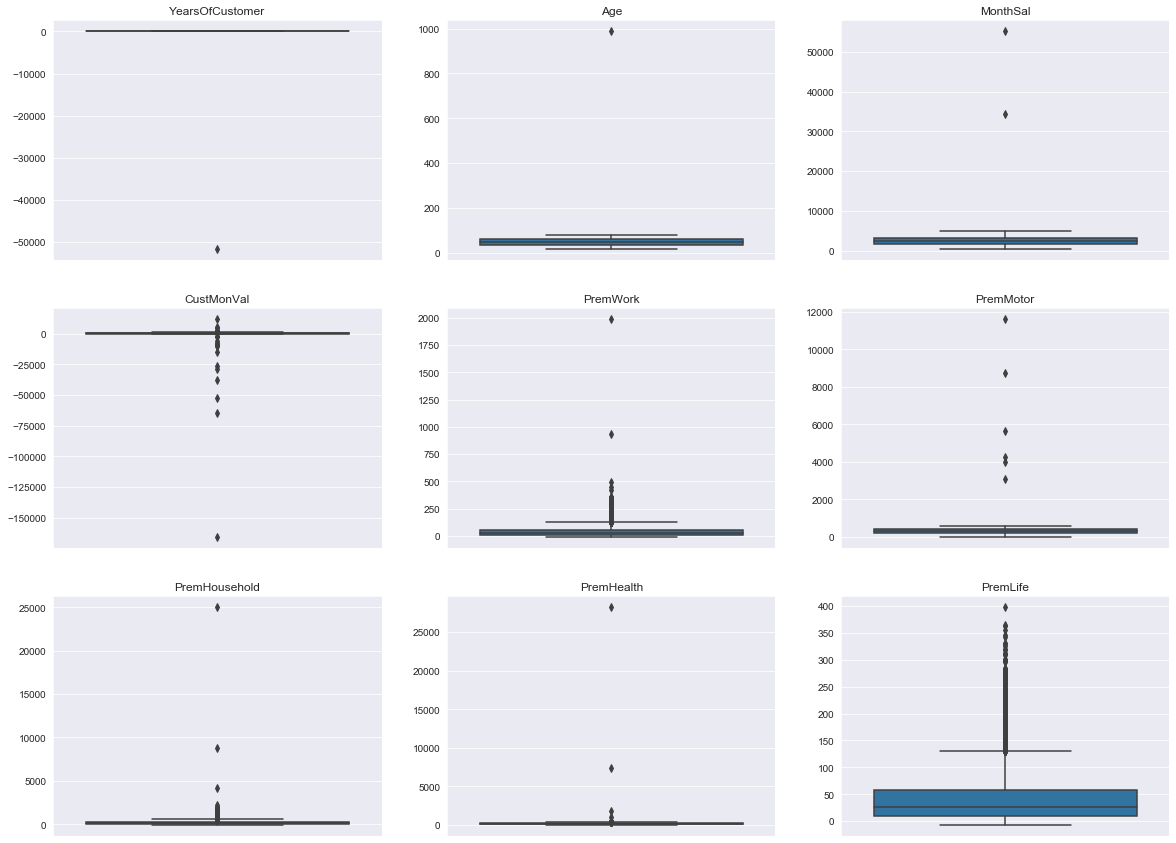

In [116]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

sns.boxplot(data=df, y='YearsOfCustomer', ax=axes[0][0]).set(ylabel=None);
sns.boxplot(data=df, y='Age', ax=axes[0][1]).set(ylabel=None);
sns.boxplot(data=df, y='MonthSal', ax=axes[0][2]).set(ylabel=None);
sns.boxplot(data=df, y='CustMonVal', ax=axes[1][0]).set(ylabel=None);
sns.boxplot(data=df, y='PremWork', ax=axes[1][1]).set(ylabel=None);
sns.boxplot(data=df, y='PremMotor', ax=axes[1][2]).set(ylabel=None);
sns.boxplot(data=df, y='PremHousehold', ax=axes[2][0]).set(ylabel=None);
sns.boxplot(data=df, y='PremHealth', ax=axes[2][1]).set(ylabel=None);
sns.boxplot(data=df, y='PremLife', ax=axes[2][2]).set(ylabel=None);

axes[0][0].set(title='YearsOfCustomer');
axes[0][1].set(title='Age');
axes[0][2].set(title='MonthSal');
axes[1][0].set(title='CustMonVal');
axes[1][1].set(title='PremWork');
axes[1][2].set(title='PremMotor');
axes[2][0].set(title='PremHousehold');
axes[2][1].set(title='PremHealth');
axes[2][2].set(title='PremLife');

plt.show();

Based on the visualizations above, we decided to do the following cleaning in order to delete the outliers from our table.

<ul>
<li><b>Age</b> > 200</li>
<li><b>YearsOfCustomer</b> < -100 </li>
<li><b>PremWork</b> > 750 </li>
<li><b>PremMotor</b> > 8.000 </li>
<li><b>PremHousehold</b> > 5.000 </li>
<li><b>PremHealth</b> > 5.000 </li>
<li><b>CustMonVal</b> > -10.000 </li>
<li><b>ClaimsRate</b> > 4 </li>
</ul>

This will remove the wrong filling values in <b>BirthYear</b> and <b>FirstPolYear</b>. Altough we believe that the <b>MonthSal</b> numbers might not be miss filled, we opted to remove this outliers in order for the model to work best.

In [117]:
#Creating df_clean with the instructions above and showing its side compared to the original df
df_clean = df[(df['MonthSal'] < 30000) &(df['Age'] < 200) & (df['YearsOfCustomer'] > -100) & (df['PremWork'] < 750) & (df['PremMotor'] < 8000) & (df['PremHousehold'] < 5000) & (df['PremHealth'] < 5000) &  (df['CustMonVal'] > -10000) &  (df['ClaimsRate'] < 4)]

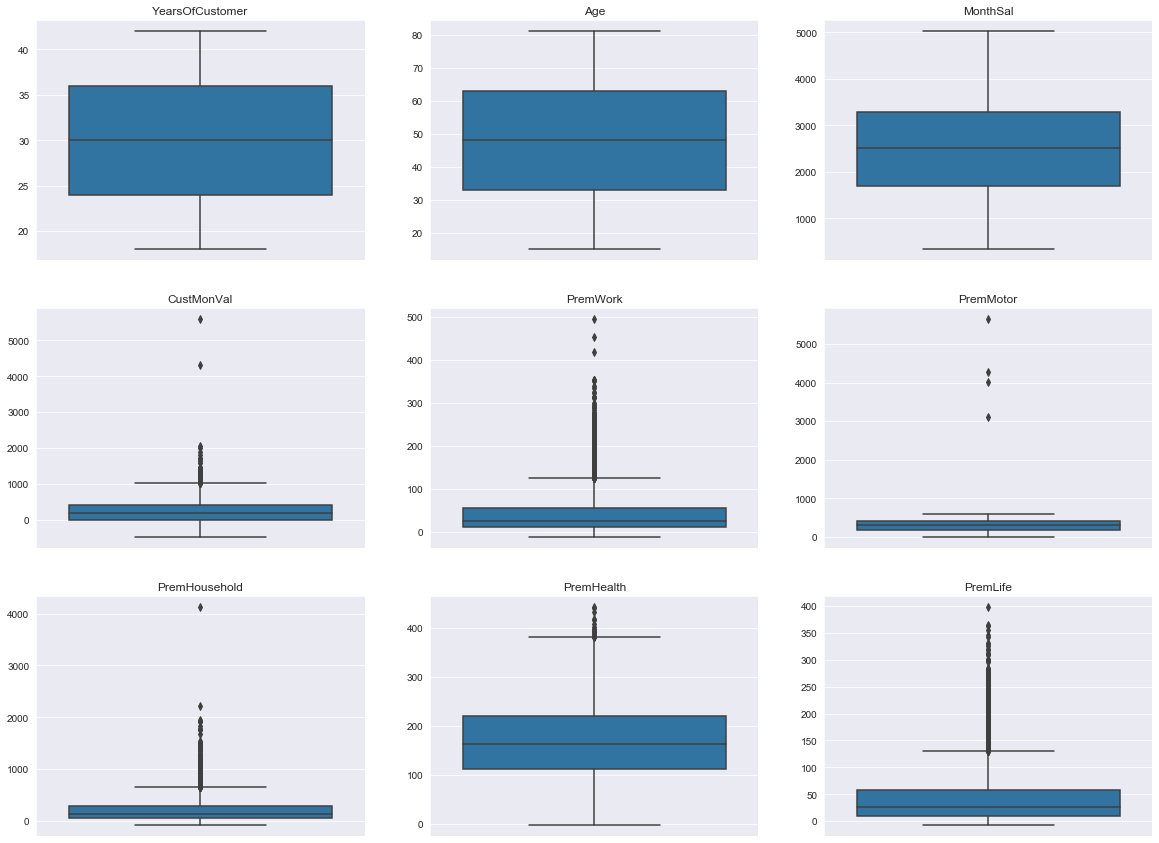

In [118]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

sns.boxplot(data=df_clean, y='YearsOfCustomer', ax=axes[0][0]).set(ylabel=None);
sns.boxplot(data=df_clean, y='Age', ax=axes[0][1]).set(ylabel=None);
sns.boxplot(data=df_clean, y='MonthSal', ax=axes[0][2]).set(ylabel=None);
sns.boxplot(data=df_clean, y='CustMonVal', ax=axes[1][0]).set(ylabel=None);
sns.boxplot(data=df_clean, y='PremWork', ax=axes[1][1]).set(ylabel=None);
sns.boxplot(data=df_clean, y='PremMotor', ax=axes[1][2]).set(ylabel=None);
sns.boxplot(data=df_clean, y='PremHousehold', ax=axes[2][0]).set(ylabel=None);
sns.boxplot(data=df_clean, y='PremHealth', ax=axes[2][1]).set(ylabel=None);
sns.boxplot(data=df_clean, y='PremLife', ax=axes[2][2]).set(ylabel=None);

axes[0][0].set(title='YearsOfCustomer');
axes[0][1].set(title='Age');
axes[0][2].set(title='MonthSal');
axes[1][0].set(title='CustMonVal');
axes[1][1].set(title='PremWork');
axes[1][2].set(title='PremMotor');
axes[2][0].set(title='PremHousehold');
axes[2][1].set(title='PremHealth');
axes[2][2].set(title='PremLife');

plt.show();

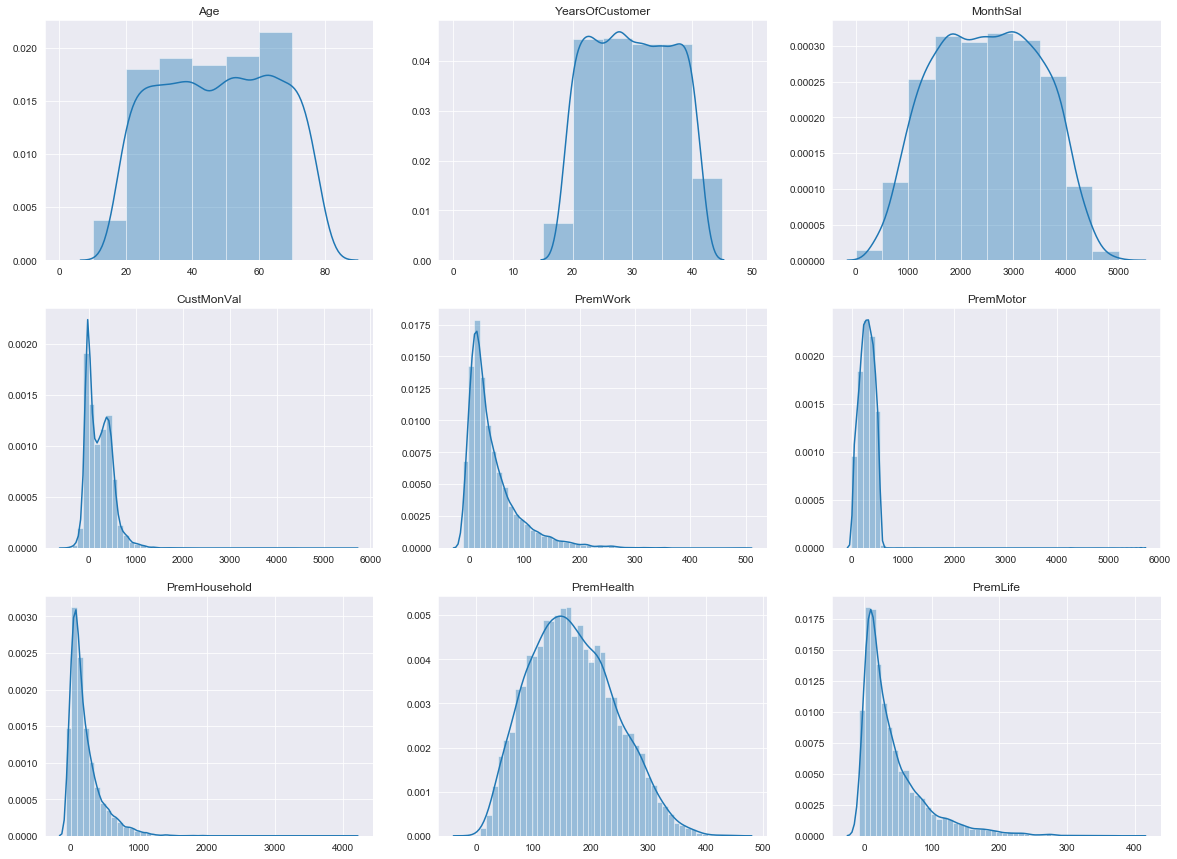

In [119]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

sns.distplot(df_clean["Age"], bins=[0, 10, 20, 30, 40, 50, 60, 70], ax=axes[0][0]).set(xlabel=None);
sns.distplot(df_clean["YearsOfCustomer"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], ax=axes[0][1]).set(xlabel=None);
sns.distplot(df_clean["MonthSal"], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], ax=axes[0][2]).set(xlabel=None);
sns.distplot(df_clean["CustMonVal"], ax=axes[1][0]).set(xlabel=None);
sns.distplot(df_clean["PremWork"], ax=axes[1][1]).set(xlabel=None);
sns.distplot(df_clean["PremMotor"], ax=axes[1][2]).set(xlabel=None);
sns.distplot(df_clean["PremHousehold"], ax=axes[2][0]).set(xlabel=None);
sns.distplot(df_clean["PremHealth"], ax=axes[2][1]).set(xlabel=None);
sns.distplot(df_clean["PremLife"], ax=axes[2][2]).set(xlabel=None);


axes[0][0].set(title='Age');
axes[0][1].set(title='YearsOfCustomer');
axes[0][2].set(title='MonthSal');
axes[1][0].set(title='CustMonVal');
axes[1][1].set(title='PremWork');
axes[1][2].set(title='PremMotor');
axes[2][0].set(title='PremHousehold');
axes[2][1].set(title='PremHealth');
axes[2][2].set(title='PremLife');

plt.show();

In [120]:
#Final outcome after removing the Outliers
print(round(df_clean.shape[0] / df.shape[0], 4),'%')
print(df.shape[0] - df_clean.shape[0])

0.9775 %
232


<h2>3. Data Exploration</h2>

<h3>Issue 1: Age < YearsOf Customer</h3>

The first issue we found is regarding the amount of people who had insurances for more time that were alived.

<b>There is a total of 1.939 people with Years as a Customer bigger than their ages.</b>

In [121]:
df_clean[df_clean.Age < df_clean.YearsOfCustomer]

EducDeg   MonthSal  GeoLivArea  Children  CustMonVal  \
CustID                                                                         
2.00000      b'2 - High School'  677.00000     4.00000   1.00000  -131.13000   
14.00000           b'1 - Basic' 1043.00000     3.00000   1.00000   -75.12000   
19.00000           b'1 - Basic' 1414.00000     3.00000   1.00000   230.38000   
23.00000     b'2 - High School' 1495.00000     1.00000   1.00000   -89.79000   
41.00000     b'2 - High School' 1177.00000     4.00000   1.00000   121.36000   
...                         ...        ...         ...       ...         ...   
10268.00000        b'1 - Basic'  834.00000     4.00000   1.00000   254.72000   
10269.00000      b'3 - BSc/MSc' 1414.00000     3.00000   1.00000    50.46000   
10274.00000  b'2 - High School' 1035.00000     1.00000   1.00000   293.51000   
10289.00000  b'2 - High School' 1465.00000     1.00000   1.00000   795.15000   
10291.00000        b'1 - Basic'  626.00000     3.00000   1.00000   176.26000   

             ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
CustID                                                                    
2.00000         1.12000   77.46000      416.20000   116.69000 194.48000   
14.00000        1.06000   44.34000      342.85000   127.69000 267.94000   
19.00000        0.71000  313.17000      373.40000   121.80000  14.78000   
23.00000        1.08000  209.04000      308.95000   192.48000  64.79000   
41.00000        0.84000   52.01000      455.65000   135.47000 146.36000   
...                 ...        ...            ...         ...       ...   
10268.00000     0.67000  181.48000      309.50000   134.58000 114.80000   
10269.00000     0.90000  129.58000      167.80000   184.48000 165.92000   
10274.00000     0.58000  235.71000      195.60000   103.13000 170.92000   
10289.00000     0.35000   67.79000      820.15000   102.13000 182.48000   
10291.00000     0.85000    6.89000      878.50000   103.13000 113.02000   

             PremWork      Age  YearsOfCustomer  
CustID                                           
2.00000     106.13000 21.00000         35.00000  
14.00000     94.46000 16.00000         33.00000  
19.00000     72.57000 34.00000         35.00000  
23.00000     54.90000 30.00000         40.00000  
41.00000    148.03000 21.00000         22.00000  
...               ...      ...              ...  
10268.00000  98.24000 20.00000         39.00000  
10269.00000  75.46000 28.00000         29.00000  
10274.00000  58.12000 24.00000         27.00000  
10289.00000  86.46000 23.00000         34.00000  
10291.00000 201.26000 17.00000         22.00000  

[1955 rows x 13 columns]

<h3>Issue 2: Under 16 with Insurances</h3>

There is 12 clients under 16 that has values for PremHousehold, PremWork and PremMotor, which wouldn't make sense for such audience.

In [122]:
df_U16 = df_clean[(df['Age'] < 16)]
df_U16[['Age', 'MonthSal', 'PremMotor', 'PremHousehold', 'PremWork', 'PremLife', 'PremHealth']]

df_U16.shape

Age   MonthSal  PremMotor  PremHousehold  PremWork  PremLife  \
CustID                                                                         
660.00000  15.00000 1284.00000   46.23000     1079.65000 -10.00000 252.27000   
690.00000  15.00000 1180.00000   54.90000      406.20000 256.05000 112.02000   
866.00000  15.00000  562.00000   40.34000      847.95000 112.13000 178.70000   
1437.00000 15.00000  823.00000  129.58000      177.80000 218.15000 176.70000   
2580.00000 15.00000 1006.00000   48.23000      396.75000  24.45000 127.58000   
3147.00000 15.00000  372.00000   60.68000      270.60000 107.13000 182.48000   
4466.00000 15.00000  958.00000   28.56000     1359.15000 179.59000  38.23000   
4484.00000 15.00000 1241.00000   43.34000      589.55000 179.48000 121.80000   
5348.00000 15.00000 1119.00000  148.14000      628.45000  30.23000  45.12000   
5608.00000 15.00000 1131.00000   43.23000      690.70000 142.25000  87.35000   
8963.00000 15.00000 1117.00000   19.56000     1109.10000  53.90000 230.82000   
9907.00000 15.00000 1422.00000   69.68000      231.15000  82.35000 191.48000   

            PremHealth  
CustID                  
660.00000     72.68000  
690.00000     65.79000  
866.00000     94.24000  
1437.00000    58.01000  
2580.00000   291.50000  
3147.00000   177.59000  
4466.00000    68.79000  
4484.00000   142.47000  
5348.00000   221.82000  
5608.00000   157.03000  
8963.00000    55.90000  
9907.00000   201.26000

(12, 13)

<h2>4. Dealing with NaN Values</h2>

Support links:

http://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html


In [123]:
print(df_clean.isna().sum())

EducDeg             0
MonthSal            0
GeoLivArea          0
Children           13
CustMonVal          0
ClaimsRate          0
PremMotor           0
PremHousehold       0
PremHealth          0
PremLife           89
PremWork            0
Age                 0
YearsOfCustomer     0
dtype: int64


In [124]:
#As we only have one missing value for the educational column, we will simple replace the missing value with the value from the column before.
df_clean['Children'].fillna(axis=0, method='ffill', inplace=True)
#For PremLife we will fill by the mean
df_clean['PremLife'].fillna(df_clean['PremLife'].mean(), inplace=True)
#For EducDeg we will fill by the most frequent value
df_clean['EducDeg'].fillna(df_clean['EducDeg'].mode().iloc[0], inplace=True)
#For MonthSal, we previously saw a strong correlation from Age to MonthSal, we wiil use the avg MonthSal of each age to fill these NaN
df_clean['MonthSal'] = df_clean.groupby(['Age'])['MonthSal'].apply(lambda x: x.fillna(x.median()))

print(df_clean.isna().sum())

EducDeg            0
MonthSal           0
GeoLivArea         0
Children           0
CustMonVal         0
ClaimsRate         0
PremMotor          0
PremHousehold      0
PremHealth         0
PremLife           0
PremWork           0
Age                0
YearsOfCustomer    0
dtype: int64


<h1>IV. Modeling</h1>

<h2>1. Normalization: Binning and Dummying</h2>

test = df_clean.copy()

test['AgeBins'] = pd.cut(x=test['Age'], bins=[0, 19, 29, 39, 49, 59, 69, 120], labels=['<20','20-29','30-39','40-49','50-59','60-69','>=70'])


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.countplot(data=test, x="AgeBins", ax = ax[0])
sns.distplot(test['Age'], ax = ax[1])
plt.show()

In [125]:
df_norm = df_clean.copy()

#Binning columns of Age and MonthSal
df_norm['AgeBins'] = pd.cut(x=df_norm['Age'], bins=[0, 19, 29, 39, 49, 59, 69, 120], labels=['<20','20-29','30-39','40-49','50-59','60-69','>=70'])
df_norm['MonthSalBins'] = pd.cut(x=df_norm['MonthSal'], bins=[0, 1300, 1700, 2300, 2800, 3500, 30000], labels=['<1300','1300 - 1700','1700 - 2300','2300 - 2800','2800 - 3500','>=3500'])

#Creating Dummy columns for AgeBins, MonthSalBins, and EducDeg
df_norm = pd.get_dummies(df_norm, columns=['AgeBins'])
df_norm = pd.get_dummies(df_norm, columns=['EducDeg'])
df_norm = pd.get_dummies(df_norm, columns=['MonthSalBins'])
df_norm = pd.get_dummies(df_norm, columns=['GeoLivArea'])

#Deleting the Age and MonthSal original columns
cols = ['Age', 'MonthSal', 'CustMonVal']
df_norm.drop(columns=cols, inplace=True)

df_norm.head()

Children  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
CustID                                                                          
1.00000   1.00000     0.39000  375.85000       79.45000   146.36000  47.01000   
2.00000   1.00000     1.12000   77.46000      416.20000   116.69000 194.48000   
3.00000   0.00000     0.28000  206.15000      224.50000   124.58000  86.35000   
4.00000   1.00000     0.99000  182.48000       43.35000   311.17000  35.34000   
5.00000   1.00000     0.90000  338.62000       47.80000   182.59000  18.78000   

         PremWork  YearsOfCustomer  AgeBins_<20  AgeBins_20-29  ...  \
CustID                                                          ...   
1.00000  16.89000         31.00000            0              0  ...   
2.00000 106.13000         35.00000            0              1  ...   
3.00000  99.02000         25.00000            0              0  ...   
4.00000  28.34000         26.00000            0              0  ...   
5.00000  41.45000         30.00000            0              0  ...   

         MonthSalBins_<1300  MonthSalBins_1300 - 1700  \
CustID                                                  
1.00000                   0                         0   
2.00000                   1                         0   
3.00000                   0                         0   
4.00000                   1                         0   
5.00000                   0                         0   

         MonthSalBins_1700 - 2300  MonthSalBins_2300 - 2800  \
CustID                                                        
1.00000                         1                         0   
2.00000                         0                         0   
3.00000                         1                         0   
4.00000                         0                         0   
5.00000                         1                         0   

         MonthSalBins_2800 - 3500  MonthSalBins_>=3500  GeoLivArea_1.0  \
CustID                                                                   
1.00000                         0                    0               1   
2.00000                         0                    0               0   
3.00000                         0                    0               0   
4.00000                         0                    0               0   
5.00000                         0                    0               0   

         GeoLivArea_2.0  GeoLivArea_3.0  GeoLivArea_4.0  
CustID                                                   
1.00000               0               0               0  
2.00000               0               0               1  
3.00000               0               1               0  
4.00000               0               0               1  
5.00000               0               0               1  

[5 rows x 29 columns]

In [126]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10064 entries, 1.0 to 10296.0
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Children                    10064 non-null  float64
 1   ClaimsRate                  10064 non-null  float64
 2   PremMotor                   10064 non-null  float64
 3   PremHousehold               10064 non-null  float64
 4   PremHealth                  10064 non-null  float64
 5   PremLife                    10064 non-null  float64
 6   PremWork                    10064 non-null  float64
 7   YearsOfCustomer             10064 non-null  float64
 8   AgeBins_<20                 10064 non-null  uint8  
 9   AgeBins_20-29               10064 non-null  uint8  
 10  AgeBins_30-39               10064 non-null  uint8  
 11  AgeBins_40-49               10064 non-null  uint8  
 12  AgeBins_50-59               10064 non-null  uint8  
 13  AgeBins_60-69            

In [127]:
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

<h2>2. Normalization: Data Scalling</h2>

https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475

In [128]:
df_scalled = df_norm.copy()

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_scalled = pd.DataFrame(scaler.fit_transform(df_scalled), columns=df_scalled.columns)

df_scalled

Children  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
0       1.00000     0.25161    0.06725        0.03672     0.33366   0.13326   
1       1.00000     0.72258    0.01444        0.11679     0.26698   0.49711   
2       0.00000     0.18065    0.03722        0.07121     0.28472   0.23032   
3       1.00000     0.63871    0.03303        0.02814     0.70405   0.10447   
4       1.00000     0.58065    0.06066        0.02920     0.41508   0.06361   
...         ...         ...        ...            ...         ...       ...   
10059   0.00000     0.61935    0.07042        0.02959     0.39535   0.04140   
10060   0.00000     0.00000    0.02437        0.26411     0.32667   0.04907   
10061   1.00000     0.13548    0.07217        0.04941     0.32443   0.04853   
10062   1.00000     0.41935    0.03411        0.06804     0.45055   0.17493   
10063   1.00000     0.17419    0.07402        0.04029     0.32218   0.03427   

       PremWork  YearsOfCustomer  AgeBins_<20  AgeBins_20-29  ...  \
0       0.05708          0.54167      0.00000        0.00000  ...   
1       0.23341          0.70833      0.00000        1.00000  ...   
2       0.21936          0.29167      0.00000        0.00000  ...   
3       0.07971          0.33333      0.00000        0.00000  ...   
4       0.10561          0.50000      0.00000        0.00000  ...   
...         ...              ...          ...            ...  ...   
10059   0.05291          0.58333      0.00000        0.00000  ...   
10060   0.23144          0.87500      0.00000        0.00000  ...   
10061   0.03337          0.16667      0.00000        0.00000  ...   
10062   0.24681          0.70833      0.00000        0.00000  ...   
10063   0.04918          0.33333      0.00000        0.00000  ...   

       MonthSalBins_<1300  MonthSalBins_1300 - 1700  MonthSalBins_1700 - 2300  \
0                 0.00000                   0.00000                   1.00000   
1                 1.00000                   0.00000                   0.00000   
2                 0.00000                   0.00000                   1.00000   
3                 1.00000                   0.00000                   0.00000   
4                 0.00000                   0.00000                   1.00000   
...                   ...                       ...                       ...   
10059             0.00000                   0.00000                   0.00000   
10060             0.00000                   0.00000                   0.00000   
10061             0.00000                   0.00000                   0.00000   
10062             0.00000                   0.00000                   1.00000   
10063             0.00000                   0.00000                   0.00000   

       MonthSalBins_2300 - 2800  MonthSalBins_2800 - 3500  \
0                       0.00000                   0.00000   
1                       0.00000                   0.00000   
2                       0.00000                   0.00000   
3                       0.00000                   0.00000   
4                       0.00000                   0.00000   
...                         ...                       ...   
10059                   0.00000                   1.00000   
10060                   1.00000                   0.00000   
10061                   0.00000                   1.00000   
10062                   0.00000                   0.00000   
10063                   0.00000                   1.00000   

       MonthSalBins_>=3500  GeoLivArea_1.0  GeoLivArea_2.0  GeoLivArea_3.0  \
0                  0.00000         1.00000         0.00000         0.00000   
1                  0.00000         0.00000         0.00000         0.00000   
2                  0.00000         0.00000         0.00000         1.00000   
3                  0.00000         0.00000         0.00000         0.00000   
4                  0.00000         0.00000         0.00000         0.00000   
...                    ...             ...             

<Figure size 1440x720 with 0 Axes>

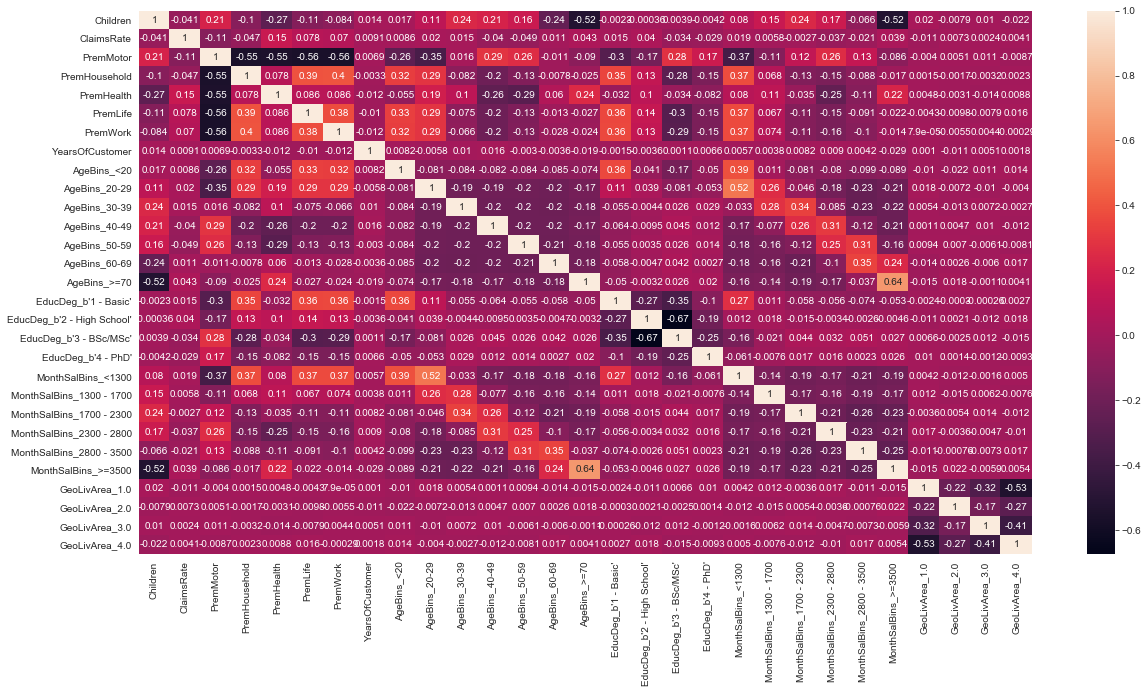

In [129]:
plt.figure(figsize=(20, 10))

heatmap = sns.heatmap(df_norm.corr(), annot=True)

<h2>3. Building the Model</h2>

In [130]:
#Building the Model

#Number of Cluester to Test
nr_cluster = 20
sse = []
sil = []

for k in range(1, nr_cluster+1):
    model = KMeans(n_clusters= k, init='k-means++', max_iter=2000, n_init=10, random_state=0)
    model.fit(df_scalled)
    sse.append(model.inertia_)

# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in range(2, nr_cluster+1):
  model = KMeans(n_clusters = k, init='k-means++', max_iter=2000, n_init=10, random_state=0)
  model.fit(df_scalled)
  labels = model.labels_
  sil.append(silhouette_score(df_scalled, labels, metric = 'euclidean'))

#Creating a Table with the Some of the Squared Error
df_error = pd.DataFrame({'k': range(1, nr_cluster+1), 'error': sse})
df_silh = pd.DataFrame({'k': range(2, nr_cluster+1), 'error': sil})

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=13, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=18, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=19, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=13, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=18, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=19, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

<h2>4. Ploting the Model Results</h2>

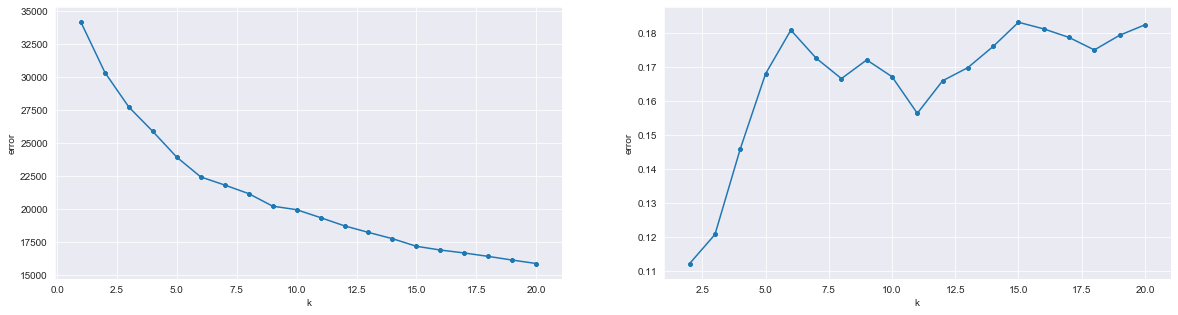

In [131]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.lineplot(data = df_error, x = 'k', y = 'error', ax = ax[0])
sns.scatterplot(data=df_error, x='k', y='error', ax = ax[0])
sns.lineplot(data = df_silh, x = 'k', y = 'error', ax = ax[1])
sns.scatterplot(data=df_silh, x='k', y='error', ax = ax[1])
plt.show()

<h1>Evaluating</h1>

How to identify the optimal number of Clusters

https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/

In [132]:
#Evaluating the Model
k = 4

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=2000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_scalled)

# Count observations per cluster
df_clean.groupby(pred_y).size()

0    2206
1    3407
2    1883
3    2568
dtype: int64

<h2>2. Top Features</h2>

In [133]:
# Check the mean values of each cluster for top 30 relevant featureslen()
top_features = df_norm.columns
clustersMeanDF = pd.DataFrame(df_norm[top_features].groupby(pred_y).mean(),columns=top_features)
clustersMeanDF.transpose()

0         1         2         3
Children                     0.64914   0.91107   0.21349   0.84463
ClaimsRate                   0.66838   0.66397   0.70650   0.69541
PremMotor                  338.20865 370.73079 269.28788 187.85275
PremHousehold              168.91698 127.40132 200.29963 356.61887
PremHealth                 153.40596 143.22086 201.87631 189.11708
PremLife                    33.83145  26.45294  39.78823  71.20499
PremWork                    31.86721  25.61208  39.64054  70.39224
YearsOfCustomer             30.03581  30.11271  29.58736  30.05802
AgeBins_<20                  0.00000   0.00176   0.00000   0.12889
AgeBins_20-29                0.00000   0.03640   0.00000   0.57360
AgeBins_30-39                0.00589   0.28207   0.00000   0.27804
AgeBins_40-49                0.07570   0.41620   0.00000   0.01947
AgeBins_50-59                0.38894   0.22395   0.04620   0.00000
AgeBins_60-69                0.41750   0.03962   0.35688   0.00000
AgeBins_>=70                 0.11197   0.00000   0.59692   0.00000
EducDeg_b'1 - Basic'         0.07797   0.07749   0.08763   0.25312
EducDeg_b'2 - High School'   0.33998   0.31347   0.33829   0.38551
EducDeg_b'3 - BSc/MSc'       0.51360   0.53155   0.49336   0.31815
EducDeg_b'4 - PhD'           0.06845   0.07749   0.08072   0.04322
MonthSalBins_<1300           0.00000   0.00059   0.00000   0.52298
MonthSalBins_1300 - 1700     0.00000   0.01585   0.00000   0.43069
MonthSalBins_1700 - 2300     0.00000   0.52216   0.00000   0.04439
MonthSalBins_2300 - 2800     0.00000   0.46082   0.00106   0.00195
MonthSalBins_2800 - 3500     1.00000   0.00000   0.00000   0.00000
MonthSalBins_>=3500          0.00000   0.00059   0.99894   0.00000
GeoLivArea_1.0               0.28604   0.30408   0.28147   0.30257
GeoLivArea_2.0               0.09973   0.10097   0.11312   0.08995
GeoLivArea_3.0               0.19538   0.20458   0.19703   0.20366
GeoLivArea_4.0               0.41886   0.39037   0.40839   0.40382

<h2>2. Clustering Visualization</h2>

In [134]:
#Creating the Column for Cluster Group and SumPrem for all the Premium
df_clean['Cluster_KMean'] = kmeans.labels_
df_clean['SumPrem'] = df_clean['PremMotor'] + df_clean['PremHousehold'] + df_clean['PremHealth'] + df_clean['PremLife'] + df_clean['PremWork']

In [135]:
cluster_names = {
    0: 'Pre Retirements',
    1: 'Traditional Families',
    2: 'Rich Seniors',
    3: 'High Prem Youth',
}

df_clean['Cluster_KMean'] = df_clean['Cluster_KMean'].replace(cluster_names)

In [136]:
#Calculating the centroid of each cluster
centroids_kmeans = df_clean.groupby('Cluster_KMean').mean()

In [137]:
sns.boxplot(data = df_clean, x = 'Cluster_KMean', y = 'Age', ax = ax[0])

[Text(0.5, 1.0, 'Monthly Salary and Age by KMean Group')]

[Text(0.5, 1.0, 'Monthly Salary and Premium by KMean Group')]

[Text(0.5, 1.0, 'Monthly Salary and Claims Rate by KMean Group')]

[Text(0.5, 1.0, 'Age Distribution by KMean Group')]

[Text(0.5, 1.0, 'Monthly Salary Distribution by KMean Group')]

[Text(0.5, 1.0, 'Claims Rate Distribution by KMean Group')]

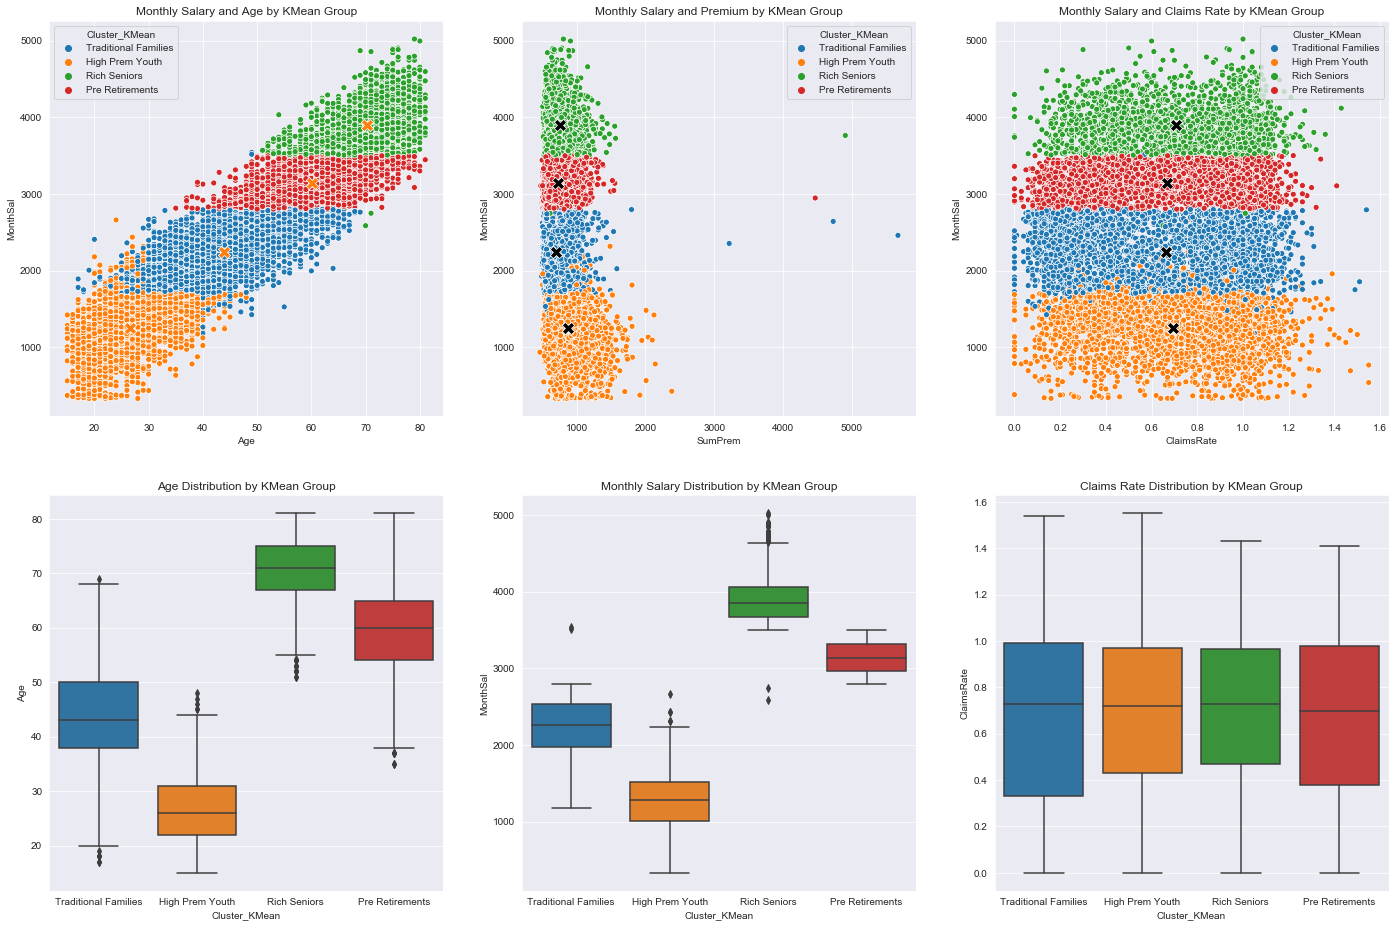

In [138]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,16))

sns.scatterplot(data=df_clean, x="Age", y = "MonthSal", hue='Cluster_KMean', ax=axes[0][0])
sns.scatterplot(data=centroids_kmeans, x="Age", y = "MonthSal", marker = 'X', s = 150, ax=axes[0][0])
sns.scatterplot(data=df_clean, x="SumPrem", y = "MonthSal", hue='Cluster_KMean', ax = axes[0][1])
sns.scatterplot(data=centroids_kmeans, x="SumPrem", y = "MonthSal", marker = 'X', s = 150, color = 'black', ax = axes[0][1])
sns.scatterplot(data=df_clean, x="ClaimsRate", y = "MonthSal", hue='Cluster_KMean', ax = axes[0][2])
sns.scatterplot(data=centroids_kmeans, x="ClaimsRate", y = "MonthSal", marker = 'X', color = 'black', s = 150, ax = axes[0][2])
sns.boxplot(data = df_clean, x = 'Cluster_KMean', y = 'Age', ax=axes[1][0])
sns.boxplot(data = df_clean, x = 'Cluster_KMean', y = 'MonthSal', ax = axes[1][1])
sns.boxplot(data = df_clean, x = 'Cluster_KMean', y = 'ClaimsRate', ax = axes[1][2])

axes[0][0].set(Title='Monthly Salary and Age by KMean Group')
axes[0][1].set(Title='Monthly Salary and Premium by KMean Group')
axes[0][2].set(Title='Monthly Salary and Claims Rate by KMean Group')

axes[1][0].set(Title='Age Distribution by KMean Group')
axes[1][1].set(Title='Monthly Salary Distribution by KMean Group')
axes[1][2].set(Title='Claims Rate Distribution by KMean Group')

plt.show()

[Text(0.5, 1.0, 'Monthly Salary and Age by KMean Group')]

[Text(0.5, 1.0, 'Monthly Salary and Age by KMean Group')]

[Text(0.5, 1.0, 'Monthly Salary and Age by KMean Group')]

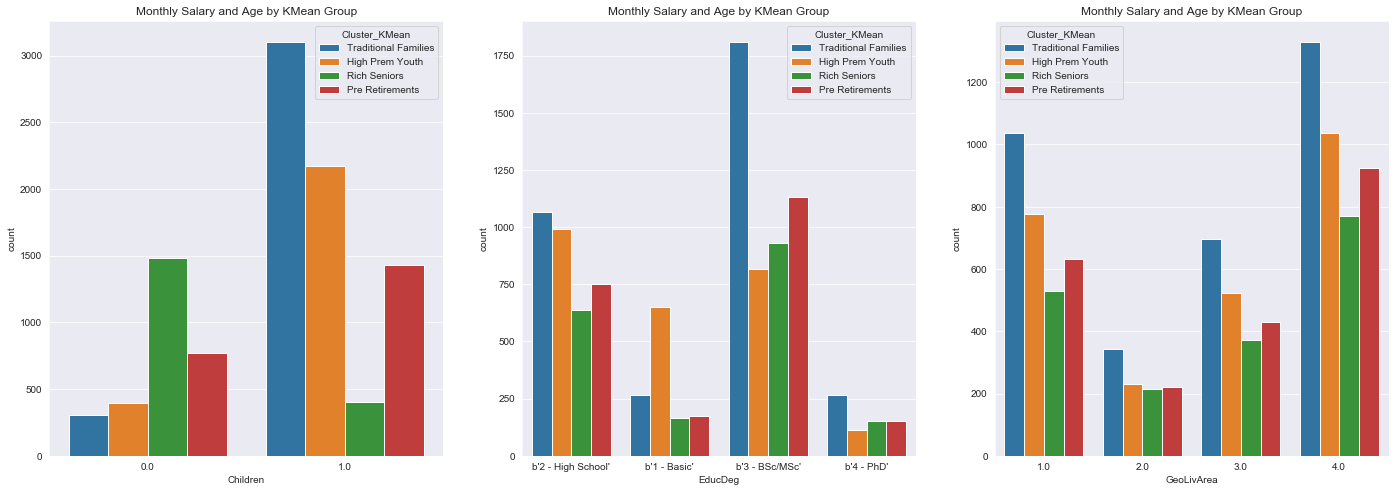

In [139]:
#Scatter Visualization
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (24, 8))

sns.countplot(data=df_clean, x='Children', hue='Cluster_KMean', ax = ax[0])
sns.countplot(data=df_clean, x='EducDeg', hue='Cluster_KMean', ax = ax[1])
sns.countplot(data=df_clean, x='GeoLivArea', hue='Cluster_KMean', ax = ax[2])

ax[0].set(Title='Monthly Salary and Age by KMean Group')
ax[1].set(Title='Monthly Salary and Age by KMean Group')
ax[2].set(Title='Monthly Salary and Age by KMean Group')

plt.show()

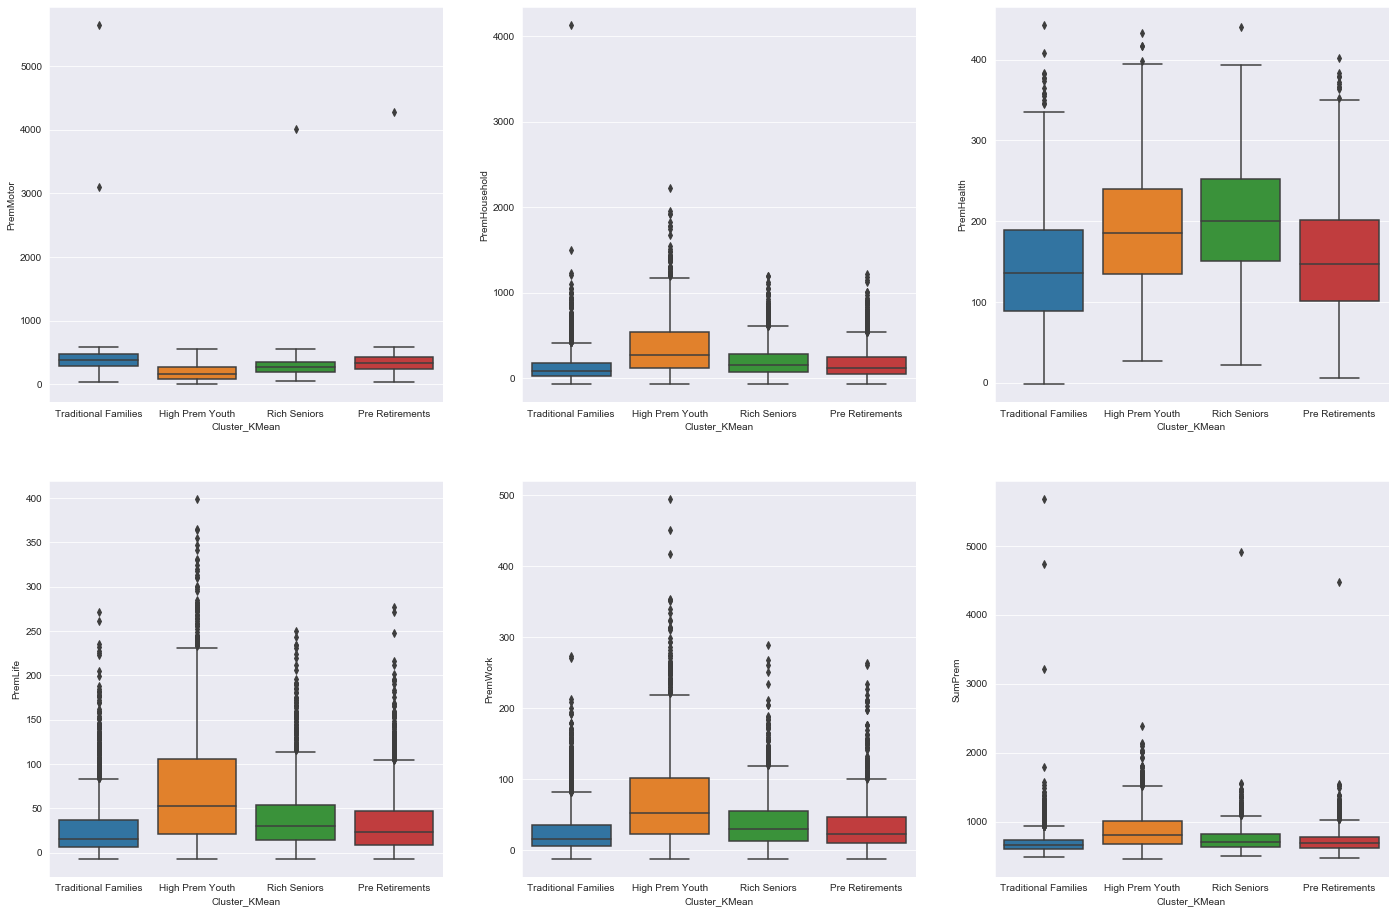

In [140]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,16))

sns.boxplot(data = df_clean, x = 'Cluster_KMean', y = 'PremMotor', ax=axes[0][0])
sns.boxplot(data = df_clean, x = 'Cluster_KMean', y = 'PremHousehold', ax = axes[0][1])
sns.boxplot(data = df_clean, x = 'Cluster_KMean', y = 'PremHealth', ax = axes[0][2])
sns.boxplot(data = df_clean, x = 'Cluster_KMean', y = 'PremLife', ax=axes[1][0])
sns.boxplot(data = df_clean, x = 'Cluster_KMean', y = 'PremWork', ax = axes[1][1])
sns.boxplot(data = df_clean, x = 'Cluster_KMean', y = 'SumPrem', ax = axes[1][2])

plt.show()

In [141]:
df_clean.head()

EducDeg   MonthSal  GeoLivArea  Children  CustMonVal  \
CustID                                                                     
1.00000  b'2 - High School' 2177.00000     1.00000   1.00000   380.97000   
2.00000  b'2 - High School'  677.00000     4.00000   1.00000  -131.13000   
3.00000        b'1 - Basic' 2277.00000     3.00000   0.00000   504.67000   
4.00000      b'3 - BSc/MSc' 1099.00000     4.00000   1.00000   -16.99000   
5.00000      b'3 - BSc/MSc' 1763.00000     4.00000   1.00000    35.23000   

         ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
CustID                                                                          
1.00000     0.39000  375.85000       79.45000   146.36000  47.01000  16.89000   
2.00000     1.12000   77.46000      416.20000   116.69000 194.48000 106.13000   
3.00000     0.28000  206.15000      224.50000   124.58000  86.35000  99.02000   
4.00000     0.99000  182.48000       43.35000   311.17000  35.34000  28.34000   
5.00000     0.90000  338.62000       47.80000   182.59000  18.78000  41.45000   

             Age  YearsOfCustomer         Cluster_KMean   SumPrem  
CustID                                                             
1.00000 34.00000         31.00000  Traditional Families 665.56000  
2.00000 21.00000         35.00000       High Prem Youth 910.96000  
3.00000 46.00000         25.00000  Traditional Families 740.60000  
4.00000 35.00000         26.00000       High Prem Youth 600.68000  
5.00000 43.00000         30.00000  Traditional Families 629.24000

In [169]:
df_clusters = df_clean['Cluster_KMean']

In [170]:
df_concat = pd.concat([df, df_clusters], axis=1, sort=False)

In [176]:
df_concat['Cluster_KMean'].fillna('Outlier', inplace=True)

In [177]:
df_concat.head(50)

EducDeg   MonthSal  GeoLivArea  Children  CustMonVal  \
CustID                                                                      
1.00000   b'2 - High School' 2177.00000     1.00000   1.00000   380.97000   
2.00000   b'2 - High School'  677.00000     4.00000   1.00000  -131.13000   
3.00000         b'1 - Basic' 2277.00000     3.00000   0.00000   504.67000   
4.00000       b'3 - BSc/MSc' 1099.00000     4.00000   1.00000   -16.99000   
5.00000       b'3 - BSc/MSc' 1763.00000     4.00000   1.00000    35.23000   
6.00000   b'2 - High School' 2566.00000     4.00000   1.00000   -24.33000   
7.00000   b'2 - High School' 4103.00000     4.00000   0.00000   -66.01000   
8.00000   b'2 - High School' 1743.00000     4.00000   1.00000  -144.91000   
9.00000       b'3 - BSc/MSc' 1862.00000     1.00000   1.00000   356.53000   
10.00000      b'3 - BSc/MSc' 3842.00000     1.00000   0.00000  -119.35000   
11.00000      b'3 - BSc/MSc' 3995.00000     4.00000   0.00000   290.17000   
12.00000      b'3 - BSc/MSc' 2834.00000     3.00000   1.00000   405.74000   
13.00000      b'3 - BSc/MSc' 3757.00000     1.00000   0.00000     2.34000   
14.00000        b'1 - Basic' 1043.00000     3.00000   1.00000   -75.12000   
15.00000  b'2 - High School' 1981.00000     1.00000   1.00000   -89.00000   
16.00000      b'3 - BSc/MSc'  974.00000     4.00000   1.00000   290.06000   
17.00000  b'2 - High School' 2437.00000     1.00000   1.00000   100.58000   
18.00000      b'3 - BSc/MSc' 2728.00000     4.00000   1.00000    78.91000   
19.00000        b'1 - Basic' 1414.00000     3.00000   1.00000   230.38000   
20.00000          b'4 - PhD' 2751.00000     1.00000   1.00000   352.96000   
21.00000          b'4 - PhD' 1704.00000     4.00000   1.00000   373.73000   
22.00000  b'2 - High School'        nan     3.00000   1.00000   111.37000   
23.00000  b'2 - High School' 1495.00000     1.00000   1.00000   -89.79000   
24.00000  b'2 - High School' 2870.00000     4.00000   1.00000   290.05000   
25.00000      b'3 - BSc/MSc' 3201.00000     4.00000   0.00000   108.13000   
26.00000          b'4 - PhD' 3776.00000     2.00000   0.00000   376.30000   
27.00000          b'4 - PhD' 4281.00000     3.00000   0.00000   430.86000   
28.00000          b'4 - PhD' 3619.00000     1.00000   0.00000    -7.22000   
29.00000      b'3 - BSc/MSc' 3639.00000     4.00000   0.00000   264.17000   
30.00000      b'3 - BSc/MSc' 2660.00000     3.00000   0.00000     2.00000   
31.00000  b'2 - High School' 2148.00000     4.00000   1.00000   427.76000   
32.00000  b'2 - High School' 3490.00000     4.00000   0.00000   240.16000   
33.00000      b'3 - BSc/MSc' 2126.00000     4.00000   1.00000    -2.44000   
34.00000  b'2 - High School' 1601.00000     1.00000   1.00000    -5.55000   
35.00000      b'3 - BSc/MSc' 3662.00000     3.00000   0.00000   336.07000   
36.00000  b'2 - High School' 2420.00000     3.00000   0.00000    53.80000   
37.00000  b'2 - High School' 2401.00000     4.00000   1.00000     7.24000   
38.00000  b'2 - High School' 3343.00000     1.00000   0.00000   -31.78000   
39.00000  b'2 - High School' 3985.00000     3.00000   0.00000   -14.22000   
40.00000      b'3 - BSc/MSc' 3858.00000     1.00000   0.00000    -1.55000   
41.00000  b'2 - High School' 1177.00000     4.00000   1.00000   121.36000   
42.00000      b'3 - BSc/MSc' 3256.00000     1.00000   1.00000   402.63000   
43.00000  b'2 - High School' 2116.00000     4.00000   1.00000   710.80000   
44.00000  b'2 - High School' 1353.00000     2.00000   1.00000   -77.01000   
45.00000      b'3 - BSc/MSc' 1065.00000     1.00000   1.00000  -128.68000   
46.00000      b'3 - BSc/MSc' 1937.00000     3.00000   1.00000   624.34000   
47.00000      b'3 - BSc/MSc' 1219.00000     4.00000   1.00000   -94.90000   
48.00000  b'2 - High School' 4233.00000     3.00000   0.00000   279.28000   
49.00000      b'3 - BSc/MSc' 2381.00000     3.00000   1.00000  -132.88000   
50.00000  b'2 - High School' 2660.00000     1.00000   1.00000   -21.11000   

          Claims